In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def calculate_nakamoto_coefficient_optimism(file):
    data = file

    # Total voting power of the anticapture commission (first delegate)
    committee_voting_power = data.loc[data['delegate'] == '0x3eee61b92c36e97be6319bf9096a1ac3c04a1466', 'voting_power'].values[0]
    committee_members = 20
    individual_power = committee_voting_power / committee_members

    # Generate new addresses for the committee members
    committee_delegates = [f'committee_member_{i+1}' for i in range(committee_members)]
    committee_voting_powers = [individual_power] * committee_members

    # Remove the original delegate representing the committee
    data = data[data['delegate'] != '0x3eee61b92c36e97be6319bf9096a1ac3c04a1466']

    # Create a DataFrame for the committee members
    committee_df = pd.DataFrame({
        'delegate': committee_delegates,
        'voting_power': committee_voting_powers
    })

    # Append the committee members to the original dataset
    data = pd.concat([data, committee_df], ignore_index=True)

    # Sort delegates by their voting power in descending order
    data = data.sort_values(by='voting_power', ascending=False).reset_index(drop=True)

    # Calculate the cumulative sum of the voting power
    data['cumulative_voting_power'] = data['voting_power'].cumsum()

    # Calculate the total voting power
    total_voting_power = data['voting_power'].sum()

    # Calculate the cumulative share of the total voting power
    data['cumulative_share'] = data['cumulative_voting_power'] / total_voting_power

    # Determine the Nakamoto coefficient
    nakamoto_coefficient = data[data['cumulative_share'] > 0.51].index[0] + 1

    return nakamoto_coefficient

In [3]:
def calculate_nakamoto_coefficient_other_daos(file):
    data = file

    # Sort delegates by their voting power in descending order
    data = data.sort_values(by='voting_power', ascending=False).reset_index(drop=True)

    # Calculate the cumulative sum of the voting power
    data['cumulative_voting_power'] = data['voting_power'].cumsum()

    # Calculate the total voting power
    total_voting_power = data['voting_power'].sum()

    # Calculate the cumulative share of the total voting power
    data['cumulative_share'] = data['cumulative_voting_power'] / total_voting_power

    # Determine the Nakamoto coefficient
    nakamoto_coefficient = data[data['cumulative_share'] > 0.51].index[0] + 1

    return nakamoto_coefficient

In [4]:
if __name__ == "__main__":

    # Read the data from csv files
    optimism = pd.read_csv("../Data_Source/optimism_delegate.csv", encoding='latin1')
    compound = pd.read_csv("../Data_Source/compound_delegate.csv", encoding='latin1')
    aave = pd.read_csv("../Data_Source/aave_delegate.csv", encoding='latin1')
    uniswap = pd.read_csv("../Data_Source/uniswap_delegate.csv", encoding='latin1')

    # Calculate Nakamoto coefficients
    nakamoto_optimism = calculate_nakamoto_coefficient_optimism(optimism)
    nakamoto_compound = calculate_nakamoto_coefficient_other_daos(compound)
    nakamoto_aave = calculate_nakamoto_coefficient_other_daos(aave)
    nakamoto_uniswap = calculate_nakamoto_coefficient_other_daos(uniswap)

    # Print the results
    print("Nakamoto Coefficient for Optimism:", nakamoto_optimism)
    print("Nakamoto Coefficient for Compound:", nakamoto_compound)
    print("Nakamoto Coefficient for Aave:", nakamoto_aave)
    print("Nakamoto Coefficient for Uniswap:", nakamoto_uniswap)

    # Read the data from csv files
    new_optimism = pd.read_csv("../Data_Source/optimism_delegates_data.csv", encoding='latin1')
    new_compound = pd.read_csv("../Data_Source/compound_delegates_data.csv", encoding='latin1')
    new_aave = pd.read_csv("../Data_Source/aave_delegates_data.csv", encoding='latin1')
    new_uniswap = pd.read_csv("../Data_Source/uniswap_delegates_data.csv", encoding='latin1')

    # Calculate Nakamoto coefficients
    nakamoto_optimism = calculate_nakamoto_coefficient_optimism(new_optimism)
    nakamoto_compound = calculate_nakamoto_coefficient_other_daos(new_compound)
    nakamoto_aave = calculate_nakamoto_coefficient_other_daos(new_aave)
    nakamoto_uniswap = calculate_nakamoto_coefficient_other_daos(new_uniswap)

    # Print the results
    print("Nakamoto Coefficient for Optimism:", nakamoto_optimism)
    print("Nakamoto Coefficient for Compound:", nakamoto_compound)
    print("Nakamoto Coefficient for Aave:", nakamoto_aave)
    print("Nakamoto Coefficient for Uniswap:", nakamoto_uniswap)

Nakamoto Coefficient for Optimism: 20
Nakamoto Coefficient for Compound: 19
Nakamoto Coefficient for Aave: 8
Nakamoto Coefficient for Uniswap: 17
Nakamoto Coefficient for Optimism: 21
Nakamoto Coefficient for Compound: 13
Nakamoto Coefficient for Aave: 8
Nakamoto Coefficient for Uniswap: 17


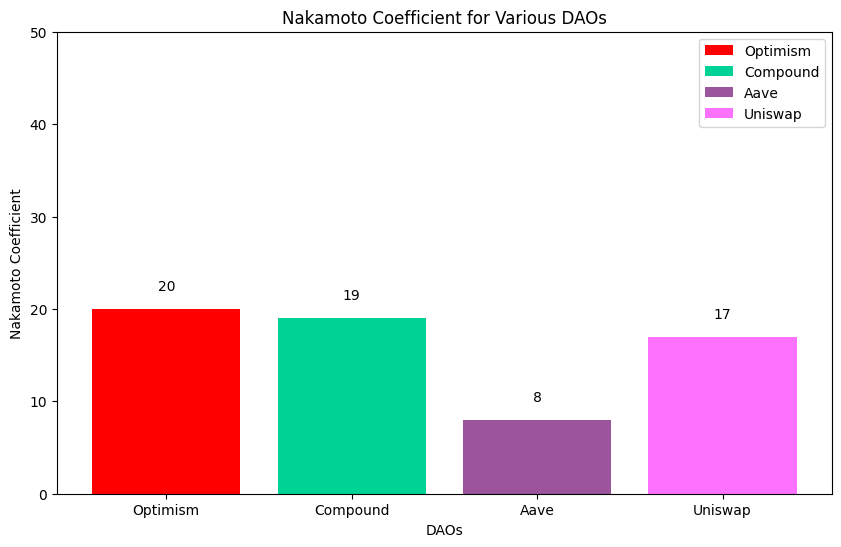

In [5]:
# HHI values
nakamoto_values = {
    'Optimism': 20,
    'Compound': 19,
    'Aave': 8,
    'Uniswap': 17
}

# Extract labels and values
labels = list(nakamoto_values.keys())
values = list(nakamoto_values.values())

# Colors for each DAO
colors = ['red', '#00D395', '#9c559c', '#fc72ff']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colors)

# Add title and labels
plt.title('Nakamoto Coefficient for Various DAOs')
plt.xlabel('DAOs')
plt.ylabel('Nakamoto Coefficient')
plt.ylim(0, 50)

# Annotate the HHI values on top of the bars
for i, value in enumerate(values):
    plt.text(i, value+2, f'{value}', ha='center')

# Add legend
legend_labels = ['Optimism', 'Compound', 'Aave', 'Uniswap']
plt.legend(bars, legend_labels)

# Show the chart
plt.show()

### Updated data

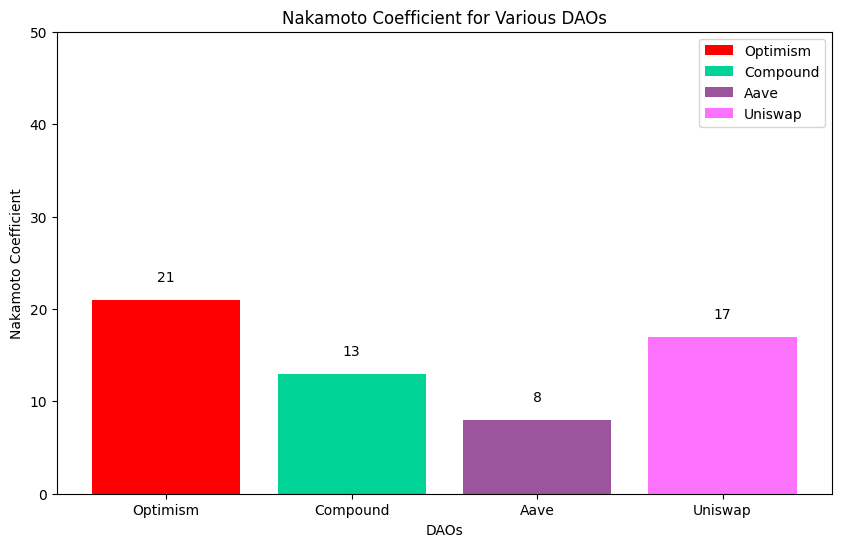

In [6]:
# HHI values
nakamoto_values = {
    'Optimism': 21,
    'Compound': 13,
    'Aave': 8,
    'Uniswap': 17
}

# Extract labels and values
labels = list(nakamoto_values.keys())
values = list(nakamoto_values.values())

# Colors for each DAO
colors = ['red', '#00D395', '#9c559c', '#fc72ff']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colors)

# Add title and labels
plt.title('Nakamoto Coefficient for Various DAOs')
plt.xlabel('DAOs')
plt.ylabel('Nakamoto Coefficient')
plt.ylim(0, 50)

# Annotate the HHI values on top of the bars
for i, value in enumerate(values):
    plt.text(i, value+2, f'{value}', ha='center')

# Add legend
legend_labels = ['Optimism', 'Compound', 'Aave', 'Uniswap']
plt.legend(bars, legend_labels)

# Show the chart
plt.show()